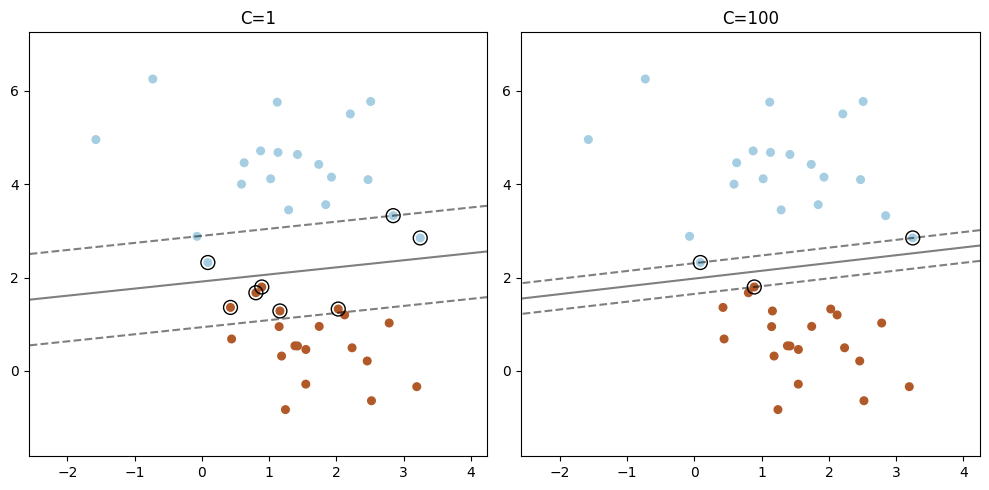

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

# 이진 분류를 위한 데이터셋 생성
X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # 힌지 손실을 사용하는 LinearSVC 모델을 훈련
    clf = LinearSVC(C=C, loss="hinge", random_state=42, dual="auto").fit(X, y)
    # 결정 함수를 통해 서포트 벡터 얻기
    decision_function = clf.decision_function(X)
    # 마진 경계 내에 있는 샘플이 서포트 벡터임
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    # 데이터 포인트 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    # DecisionBoundaryDisplay를 사용하여 결정 경계 및 마진 시각화
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    # 서포트 벡터를 강조하여 시각화
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    # 서브플롯의 제목 설정 (C 값 포함)
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()
